In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [3]:
print(df.shape)
df.isna().sum()

(369, 6)


date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df["category"].value_counts()

category
Electronics    129
Clothing       120
Accessories     67
Bags            23
Shoes           23
Clohting         1
Bgas             1
Shoeses          1
Name: count, dtype: int64

In [6]:
df['category'].replace('Bgas','Bags', inplace = True)
df['category'].replace('Clohting','Clothing', inplace = True)
df['category'].replace('Shoeses','Shoes', inplace = True)
df.drop_duplicates(inplace=True)

In [7]:
df["product"].value_counts()

product
Smartphone    81
T-Shirt       38
Coat          35
Smartwatch    35
Speaker       25
Backpack      24
Sneakers      24
Jeans         24
Hoodie        23
Watch         21
Headphones    13
Wallet        11
Tablet         9
Laptop         1
Name: count, dtype: int64

### Total Revenue

In [8]:
df["revenue"].sum()

747230.0

### highest revenue product

In [9]:
rev = df.groupby("product")["revenue"].sum()
rev.head()

product
Backpack      20400.0
Coat          33800.0
Headphones    18000.0
Hoodie        19800.0
Jeans         20650.0
Name: revenue, dtype: float64

In [10]:
def plot_series(series: pd.Series, x_label:str, y_label:str) -> None:
    plt.figure(figsize=(15,5))
    series.plot.bar()
    for index, value in enumerate(series.values):
        plt.text(index, value, str(value), ha='center', va='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

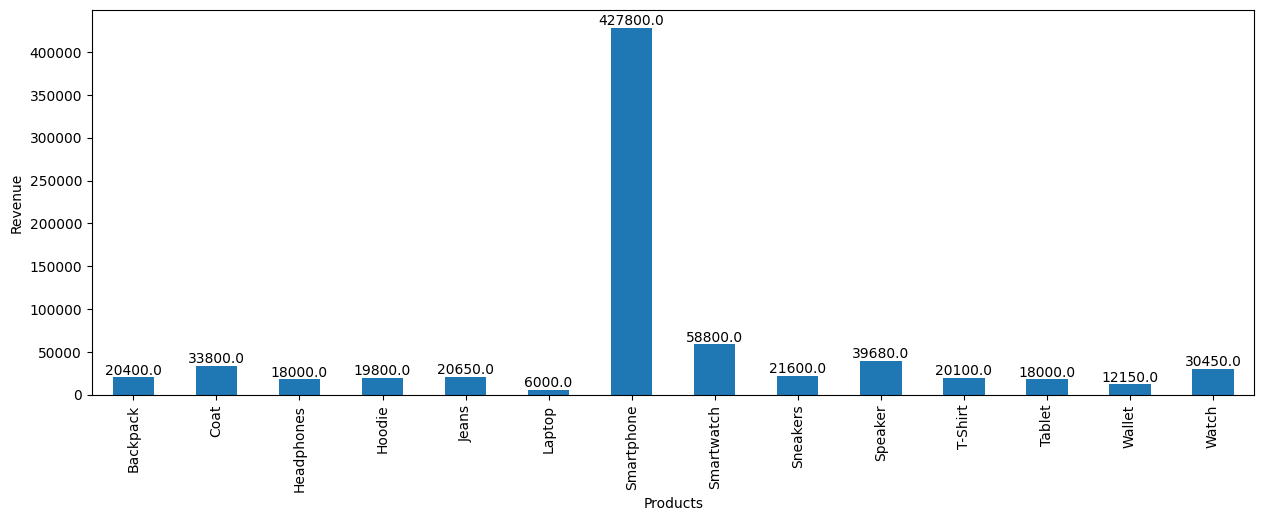

In [11]:
plot_series(rev, "Products", "Revenue")

In [12]:
rev["Smartphone"]

427800.0

### average price of a product

In [13]:
avg_prices = df.groupby("product")["price"].mean()
avg_prices

product
Backpack        50.0
Coat           100.0
Headphones     100.0
Hoodie          40.0
Jeans           50.0
Laptop        1200.0
Smartphone     600.0
Smartwatch     200.0
Sneakers        80.0
Speaker         80.0
T-Shirt         20.0
Tablet         400.0
Wallet          30.0
Watch          150.0
Name: price, dtype: float64

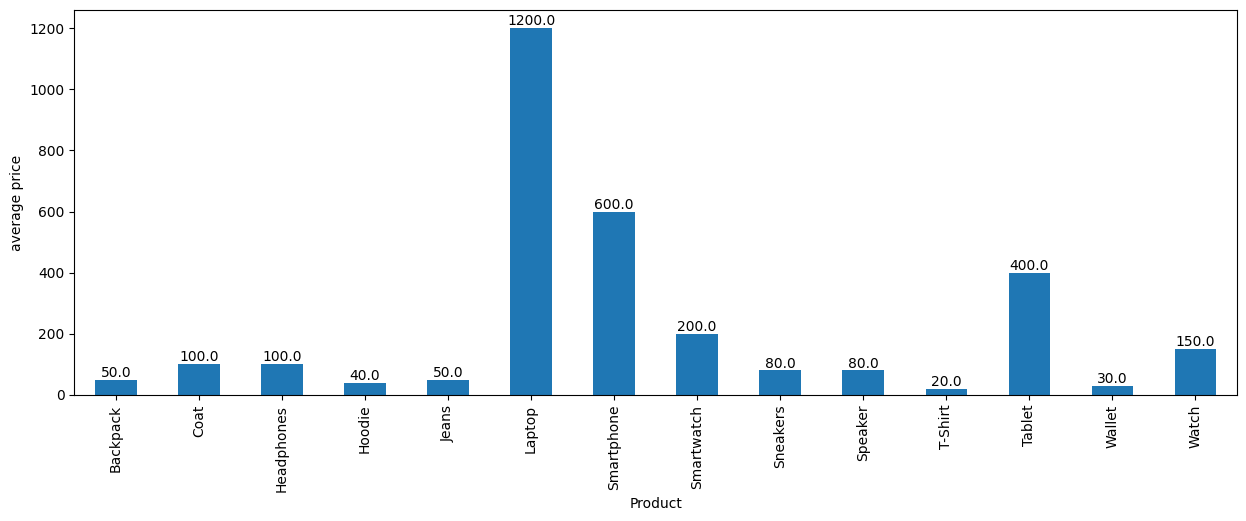

In [14]:
plot_series(avg_prices, "Product", "average price")

### total quantity of products sold

In [15]:
quantity_sold = df.groupby("product")["quantity"].sum()

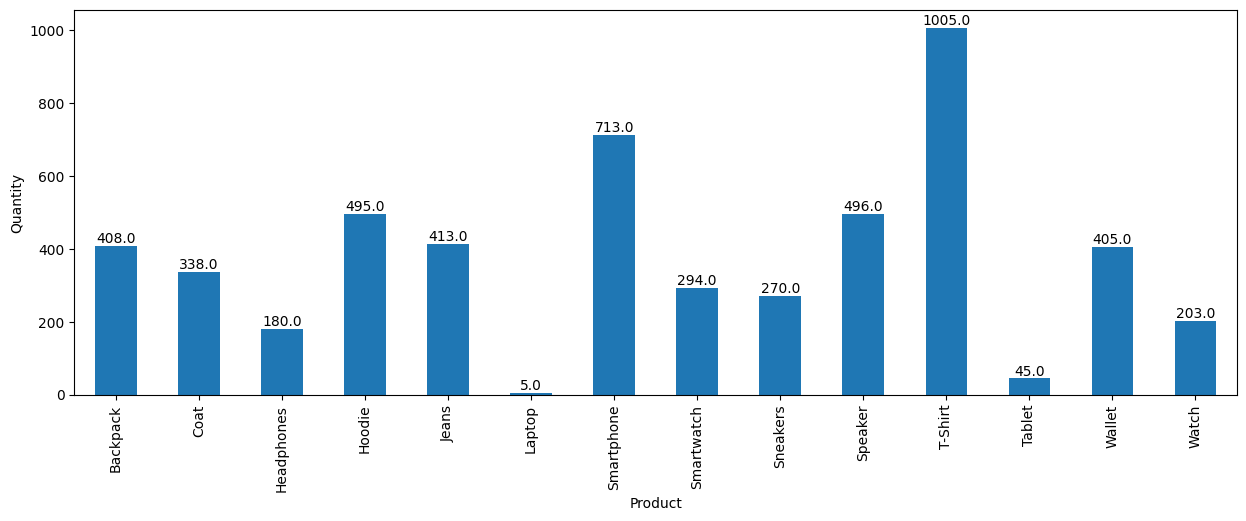

In [16]:
plot_series(quantity_sold, "Product", "Quantity")

### the highest revenue category

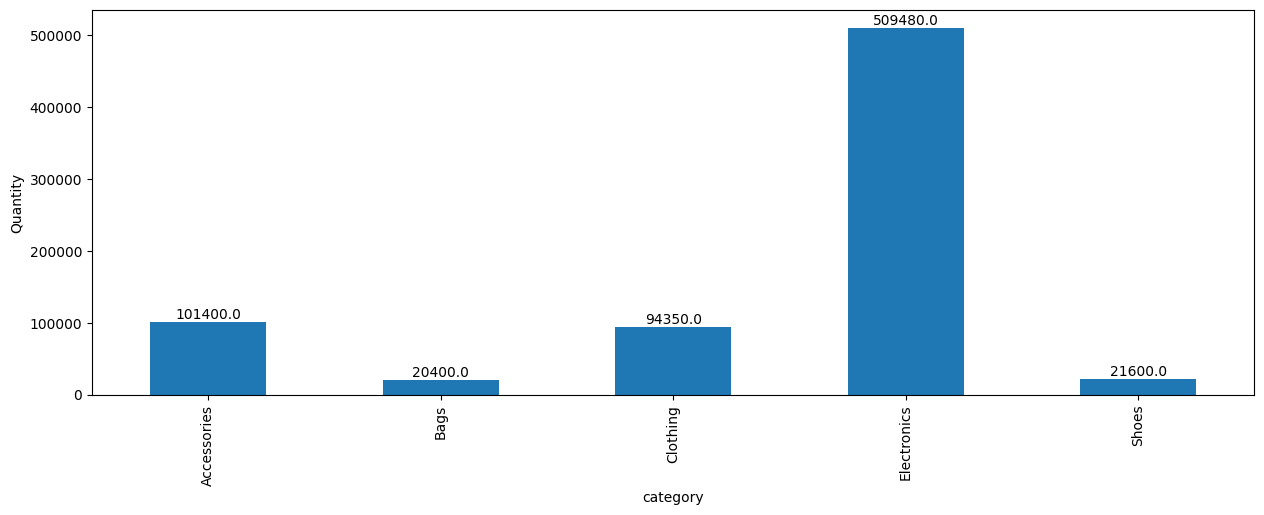

In [17]:
category_quantity_sold = df.groupby("category")["revenue"].sum()
plot_series(category_quantity_sold, "category", "Quantity")

### average revenue per sale

In [18]:
avg_revenue_per_sale = df['revenue'].sum() / df['quantity'].sum()
print('Average revenue per sale:', round(avg_revenue_per_sale,2))

Average revenue per sale: 141.79


### total revenue generated in each quarter of the year

In [19]:
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'revenue'
df['revenue'] = df['price'] * df['quantity']

# Group data by quarters and calculate total revenue for each quarter
df['quarter'] = df['date'].dt.to_period('Q')
quarterly_revenue = df.groupby('quarter')['revenue'].sum()

# Print the quarterly revenue
for quarter, revenue in quarterly_revenue.items():
    print(f"Quarter {quarter}: Total Revenue ${revenue:.2f}")

Quarter 2022Q1: Total Revenue $182100.00
Quarter 2022Q2: Total Revenue $177370.00
Quarter 2022Q3: Total Revenue $195430.00
Quarter 2022Q4: Total Revenue $192330.00
